In [294]:
# process data
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# modelling
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split


## JOIN DATASET

In [295]:
astro = pd.read_csv("astro_fix.csv")
indomart = pd.read_csv("indomart_base.csv")

In [296]:
astro.head(5)

,astro_name,astro_price
0,Barilla Pasta Rigatoni,Rp48.500
1,Barilla Pasta Angel Hair,Rp40.900
2,Masaya Beras Porang,Rp125.000
3,Mie Sedaap Soto Dus/Mie Instan,Rp108.000
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,Rp108.000


In [297]:
indomart.head(5)

,indomart_name,indomart_price
0,Barco Minyak Goreng 2L,Rp 112.500
1,Barco Minyak Goreng Refill 1000Ml,Rp 52.900
2,Happy Soya Minyak Goreng Refill 1L,Rp 52.900
3,Harumas Minyak Goreng 2L,Rp 38.500
4,Bimoli Minyak Goreng 1000Ml,Rp 20.900


In [298]:
# join

frames=[astro, indomart]
result = pd.concat(frames).reset_index(drop=True)

In [299]:
# Gabungkan dataset astro dan indomart
data = pd.concat([astro, indomart], axis=1)

In [300]:
data.head(5)

,astro_name,astro_price,indomart_name,indomart_price
0,Barilla Pasta Rigatoni,Rp48.500,Barco Minyak Goreng 2L,Rp 112.500
1,Barilla Pasta Angel Hair,Rp40.900,Barco Minyak Goreng Refill 1000Ml,Rp 52.900
2,Masaya Beras Porang,Rp125.000,Happy Soya Minyak Goreng Refill 1L,Rp 52.900
3,Mie Sedaap Soto Dus/Mie Instan,Rp108.000,Harumas Minyak Goreng 2L,Rp 38.500
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,Rp108.000,Bimoli Minyak Goreng 1000Ml,Rp 20.900


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   astro_name      42 non-null     object
 1   astro_price     42 non-null     object
 2   indomart_name   107 non-null    object
 3   indomart_price  107 non-null    object
dtypes: object(4)
memory usage: 3.5+ KB


In [302]:
# Extract Astro and Indomaret data separately and standardize column names
astro_data = data[['astro_name', 'astro_price']].rename(columns={
    'astro_name': 'name',
    'astro_price': 'price'
}).dropna()
astro_data['source'] = 'astro'

indomart_data = data[['indomart_name', 'indomart_price']].rename(columns={
    'indomart_name': 'name',
    'indomart_price': 'price'
}).dropna()
indomart_data['source'] = 'indomart'

In [303]:
# Combine the two datasets
combined_data = pd.concat([astro_data, indomart_data], ignore_index=True)

# Convert price -> numerical values (remove 'Rp' and commas)
combined_data['price'] = combined_data['price'].replace('[Rp]', '', regex=True).astype(float)

In [304]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    149 non-null    object 
 1   price   149 non-null    float64
 2   source  149 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


In [305]:
combined_data.to_csv(r'combined_data.csv', index=False)

In [306]:
# Display
combined_data.head(5)

,name,price,source
0,Barilla Pasta Rigatoni,48.5,astro
1,Barilla Pasta Angel Hair,40.9,astro
2,Masaya Beras Porang,125.0,astro
3,Mie Sedaap Soto Dus/Mie Instan,108.0,astro
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,108.0,astro


In [307]:
missing_value = combined_data.isnull().sum()
missing_value

name      0
price     0
source    0
dtype: int64

In [308]:
# numerical
combined_data.describe()

,price
count,149.000000
mean,34.667383
std,34.775055
min,2.000000
25%,7.500000
50%,19.500000
75%,54.500000
max,129.000000


In [309]:
combined_data.dtypes

name       object
price     float64
source     object
dtype: object

In [310]:
combined_data.describe(include=['object']) # categorical

,name,source
count,149,149
unique,141,2
top,Barilla Pasta Rigatoni,indomart
freq,2,107


## 2. Data Analysis

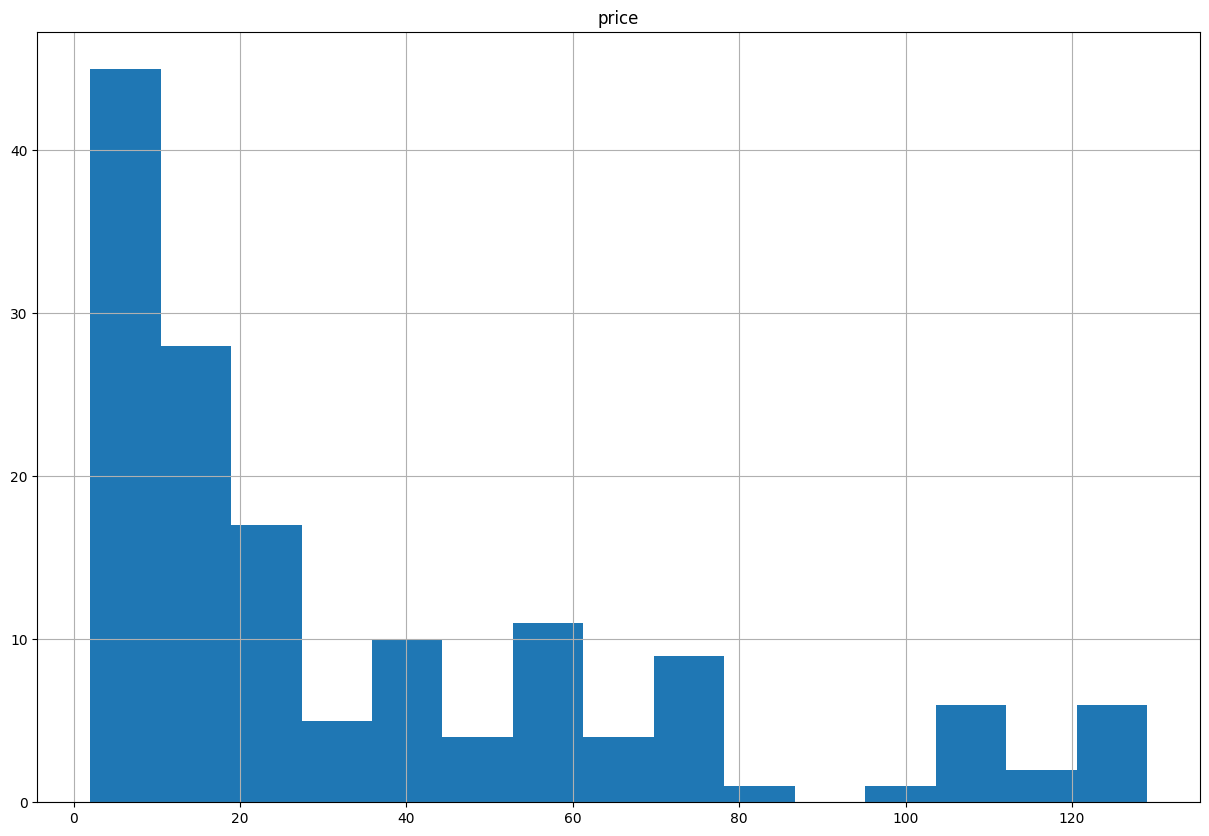

In [311]:
import matplotlib.pyplot as plt
# Plot histograms for numerical features
numerical_columns = combined_data.select_dtypes(include=['float64']).columns

combined_data[numerical_columns].hist(bins=15, figsize=(15, 10))
# plt.suptitle('Histograms for Numerical Features')
plt.show()
    

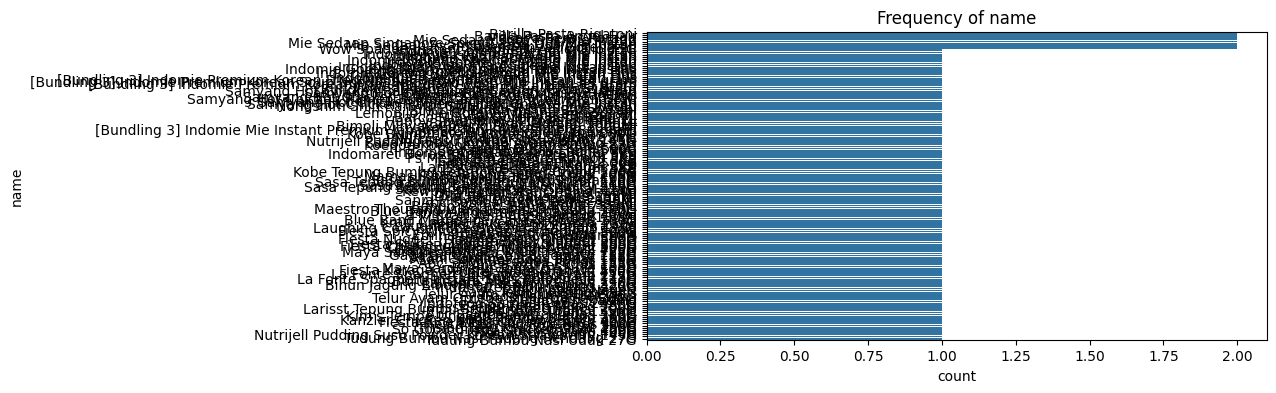

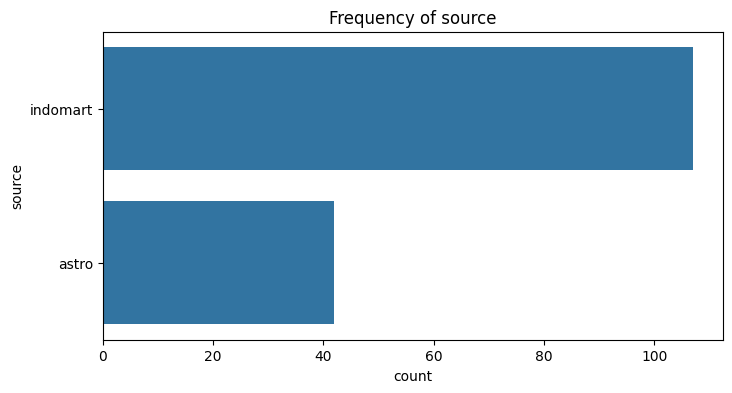

In [312]:
# categorical plot
import seaborn as sns

# Frequency plots for categorical features
categorical_columns = combined_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=combined_data[column], order=combined_data[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    plt.show()
    

## 

## 3. Labelling DATASET

In [313]:
combined_data.columns

Index(['name', 'price', 'source'], dtype='object')

In [314]:
combined_data.select_dtypes(include=['float64']).columns

Index(['price'], dtype='object')

In [315]:
combined_data['source'].value_counts()

source
indomart    107
astro        42
Name: count, dtype: int64

In [316]:
combined_data.head()

,name,price,source
0,Barilla Pasta Rigatoni,48.5,astro
1,Barilla Pasta Angel Hair,40.9,astro
2,Masaya Beras Porang,125.0,astro
3,Mie Sedaap Soto Dus/Mie Instan,108.0,astro
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,108.0,astro


In [317]:
price_quantiles = combined_data['price'].quantile([0.33, 0.66]).to_dict()

# categories labelling based on quantiles
def categorize_price(price):
    if price <= price_quantiles[0.33]:
        return 'murah'
    elif price <= price_quantiles[0.66]:
        return 'normal'
    else:
        return 'mahal'
    
combined_data['price_category'] = combined_data['price'].apply(categorize_price)

In [318]:
combined_data.head(20)

,name,price,source,price_category
0,Barilla Pasta Rigatoni,48.5,astro,mahal
1,Barilla Pasta Angel Hair,40.9,astro,mahal
2,Masaya Beras Porang,125.0,astro,mahal
3,Mie Sedaap Soto Dus/Mie Instan,108.0,astro,mahal
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,108.0,astro,mahal
5,Mie Sedaap Ayam Bawang Dus/Mie Instan,108.0,astro,mahal
6,Barilla Pasta Rigatoni,48.5,astro,mahal
7,Barilla Pasta Angel Hair,40.9,astro,mahal
8,Masaya Beras Porang,125.0,astro,mahal
9,Mie Sedaap Soto Dus/Mie Instan,108.0,astro,mahal


## 4. Preprocessing & splitting 

In [319]:
combined_data.select_dtypes(include=['float64'])

,price
0,48.5
1,40.9
2,125.0
3,108.0
4,108.0
...,...
144,56.6
145,59.9
146,13.5
147,7.5


In [320]:
combined_data.select_dtypes(include=['object'])

,name,source,price_category
0,Barilla Pasta Rigatoni,astro,mahal
1,Barilla Pasta Angel Hair,astro,mahal
2,Masaya Beras Porang,astro,mahal
3,Mie Sedaap Soto Dus/Mie Instan,astro,mahal
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,astro,mahal
...,...,...,...
144,Fiesta Spicy Karage 400G,indomart,mahal
145,Fiesta Spicy Wing 400G,indomart,mahal
146,Nutrijell Pudding Susu Powder Korean Strawberr...,indomart,normal
147,Tudung Bumbu Nasi Padang Rendang 27G,indomart,murah


In [321]:
combined_data = combined_data.drop(columns=['name'])

In [322]:
x = combined_data.drop(columns=['price_category'])
y = combined_data['price_category']

In [323]:
x.shape


(149, 2)

In [324]:
y.shape

(149,)

### encode categorical data

In [325]:
# splitting
# Train test = 60 : 40

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.4)

In [326]:
from sklearn.preprocessing import LabelEncoder
# categorical_columns = combined_data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
combined_data['source'] = label_encoder.fit_transform(combined_data['source'])

In [327]:
combined_data.head()

,price,source,price_category
0,48.5,0,mahal
1,40.9,0,mahal
2,125.0,0,mahal
3,108.0,0,mahal
4,108.0,0,mahal


In [328]:

label_encoder = LabelEncoder()

label_encoder.fit(y)
y=label_encoder.transform(y)

# classification
classes = label_encoder.classes_ 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 1 2 2 2 2 2 2
 2 1 2 1 1 0 0 0 0 2 2 0 0 0 1 1 1 2 2 1 2 2 2 0 0 0 0 2 2 0 0 0 1 1 1 1 1
 1 1 1 1 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2
 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 0 2 0 0 0 2 0 0 0 2 1
 1]


In [329]:
print(x_train.shape, x_test.shape)

(89, 2) (60, 2)


In [330]:
# categorical_columns = combined_data.select_dtypes(include=['object']).columns

# for col in categorical_columns:
# for col in categorical_columns:
#     if col in x_train.columns:
x_train['source'] = label_encoder.fit_transform(x_train['source'].astype(str))
x_test['source'] = label_encoder.transform(x_test['source'].astype(str))

In [331]:
x_train.head()

,price,source
122,10.6,1
24,97.5,0
25,129.0,0
23,120.0,0
93,58.0,1


### normalize data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'source'}>]], dtype=object)

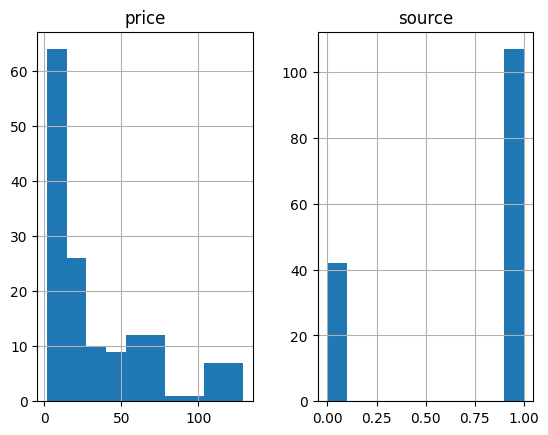

In [332]:
combined_data.hist()

In [333]:
x_train.head()

,price,source
122,10.6,1
24,97.5,0
25,129.0,0
23,120.0,0
93,58.0,1


In [334]:
scaler = MinMaxScaler()
x_train[['price']] = scaler.fit_transform(x_train[['price']])
x_test[['price']] = scaler.transform(x_test[['price']])

In [335]:
print(x_train.describe())
print(x_test.describe())

           price     source
count  89.000000  89.000000
mean    0.264877   0.752809
std     0.280892   0.433823
min     0.000000   0.000000
25%     0.057799   1.000000
50%     0.144101   1.000000
75%     0.433888   1.000000
max     1.000000   1.000000
           price     source
count  60.000000  60.000000
mean    0.235648   0.666667
std     0.268268   0.475383
min    -0.005542   0.000000
25%     0.033254   0.000000
50%     0.121140   1.000000
75%     0.392122   1.000000
max     0.963579   1.000000


In [336]:
print(classes)
print(y[:-10])  # Contoh hasil encoding

['mahal' 'murah' 'normal']
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 1 2 2 2 2 2 2
 2 1 2 1 1 0 0 0 0 2 2 0 0 0 1 1 1 2 2 1 2 2 2 0 0 0 0 2 2 0 0 0 1 1 1 1 1
 1 1 1 1 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2
 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 0 2]


In [337]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)


In [338]:
combined_data.head(9)

,price,source,price_category
0,48.5,0,mahal
1,40.9,0,mahal
2,125.0,0,mahal
3,108.0,0,mahal
4,108.0,0,mahal
5,108.0,0,mahal
6,48.5,0,mahal
7,40.9,0,mahal
8,125.0,0,mahal


In [339]:
combined_data['price_category'] = label_encoder.fit_transform(combined_data['price_category'])

In [340]:
print(combined_data.corr())

                   price    source  price_category
price           1.000000 -0.285045       -0.653350
source         -0.285045  1.000000        0.094355
price_category -0.653350  0.094355        1.000000


In [341]:
print("Distribusi y_train:", pd.Series(y_train).value_counts())
print("Distribusi y_test:", pd.Series(y_test).value_counts())

Distribusi y_train: price_category
mahal     32
normal    31
murah     26
Name: count, dtype: int64
Distribusi y_test: price_category
murah     24
mahal     19
normal    17
Name: count, dtype: int64


In [342]:
print(set(x_train.index).intersection(set(x_test.index)))  # Harus kosong

set()


In [343]:
x_train['price'] += np.random.normal(0, 0.01, size=x_train['price'].shape)

## 5. Classification

### Logistic Regression

In [344]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train_balanced, y_train_balanced)
y_pred = LR.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       mahal       1.00      0.95      0.97        19
       murah       0.75      1.00      0.86        24
      normal       0.90      0.53      0.67        17

    accuracy                           0.85        60
   macro avg       0.88      0.83      0.83        60
weighted avg       0.87      0.85      0.84        60



In [345]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.85


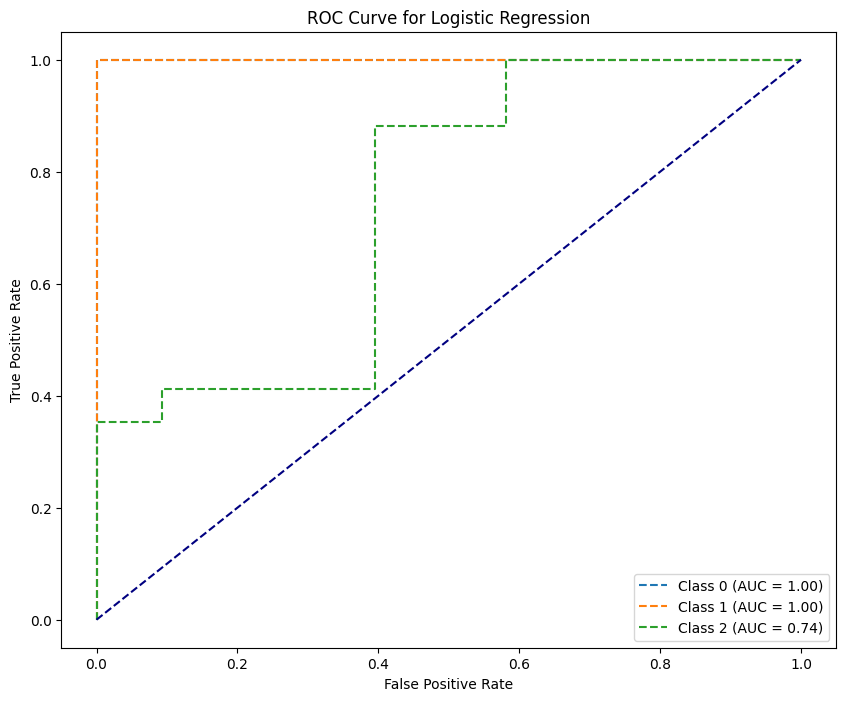

In [346]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output (untuk ROC multi-class)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Prediksi probabilitas untuk data uji
y_pred_proba = LR.predict_proba(x_test)

# ROC curve untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot garis diagonal (baseline)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Label dan judul
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [347]:
RF = RandomForestClassifier(
    n_estimators=100,       #tree amount
    max_depth=10,           
    min_samples_split=5,  
    min_samples_leaf=2, 
    random_state=42
)
# RF = RandomForestClassifier()

In [348]:
RF.fit(x_train_balanced, y_train_balanced)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [349]:
y_pred = RF.predict(x_test)
pred_prob = RF.predict_proba(x_test)

In [350]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = RF.predict(x_test)
y_pred_proba = RF.predict_proba(x_test)

print(classification_report(y_test, y_pred))
# ROC AUC untuk multi-kelas
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


              precision    recall  f1-score   support

       mahal       1.00      1.00      1.00        19
       murah       1.00      0.92      0.96        24
      normal       0.89      1.00      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [351]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.97


In [352]:
# Prediksi probabilitas untuk data uji
y_pred_proba = RF.predict_proba(x_test)

In [353]:
print("Distribusi y_test:", pd.Series(y_test).value_counts())

Distribusi y_test: price_category
murah     24
mahal     19
normal    17
Name: count, dtype: int64


In [354]:
print("Prediksi probabilitas:", y_pred_proba[:10])

Prediksi probabilitas: [[0.         1.         0.        ]
 [0.         0.98333333 0.01666667]
 [0.         1.         0.        ]
 [0.09       0.         0.91      ]
 [0.         1.         0.        ]
 [0.         0.17333333 0.82666667]
 [0.21       0.         0.79      ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]


In [355]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean CV score: {scores.mean()}")

Cross-validation scores: [0.94444444 1.         0.88888889 0.94444444 0.94117647]
Mean CV score: 0.9437908496732026


### save model

In [356]:
import joblib

# Simpan model Random Forest ke file
joblib.dump(RF, 'RF_model.pkl')
print("Model berhasil disimpan!")

Model berhasil disimpan!


## Load model and preprocess to use

In [357]:

model = joblib.load('RF_model.pkl')

In [358]:
# Encode kolom 'source'
combined_data=pd.read_csv('combined_data.csv')
combined_data['source'] = combined_data['source'].map({'astro': 0, 'indomart': 1})

In [359]:
combined_data.isnull().sum()

name      0
price     0
source    0
dtype: int64

In [360]:
# Prediksi kategori harga
input_features = combined_data[['price', 'source']]
predictions = model.predict(input_features)

# Tambahkan hasil prediksi ke dalam dataset
combined_data['price_category'] = predictions

# Tampilkan hasil
print(combined_data)

                                                  name  price  source  \
0                               Barilla Pasta Rigatoni   48.5       0   
1                             Barilla Pasta Angel Hair   40.9       0   
2                                  Masaya Beras Porang  125.0       0   
3                       Mie Sedaap Soto Dus/Mie Instan  108.0       0   
4      Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan  108.0       0   
..                                                 ...    ...     ...   
144                           Fiesta Spicy Karage 400G   56.6       1   
145                             Fiesta Spicy Wing 400G   59.9       1   
146  Nutrijell Pudding Susu Powder Korean Strawberr...   13.5       1   
147               Tudung Bumbu Nasi Padang Rendang 27G    7.5       1   
148                         Tudung Bumbu Nasi Uduk 27G    7.5       1   

    price_category  
0            mahal  
1            mahal  
2            mahal  
3            mahal  
4            mahal

In [361]:
combined_data['source'] = combined_data['source'].map({0 : 'astro', 1 : 'indomart'})

In [362]:
combined_data

,name,price,source,price_category
0,Barilla Pasta Rigatoni,48.5,astro,mahal
1,Barilla Pasta Angel Hair,40.9,astro,mahal
2,Masaya Beras Porang,125.0,astro,mahal
3,Mie Sedaap Soto Dus/Mie Instan,108.0,astro,mahal
4,Mie Sedaap Singapore Spicy Laksa Dus/Mie Instan,108.0,astro,mahal
...,...,...,...,...
144,Fiesta Spicy Karage 400G,56.6,indomart,mahal
145,Fiesta Spicy Wing 400G,59.9,indomart,mahal
146,Nutrijell Pudding Susu Powder Korean Strawberr...,13.5,indomart,mahal
147,Tudung Bumbu Nasi Padang Rendang 27G,7.5,indomart,mahal


## Case

In [363]:
import pandas as pd
import joblib

# Muat model Random Forest
model = joblib.load('RF_model.pkl')
combined_data['price_category_ori']=combined_data['price_category']
# Data combined_data (contoh)
combined_data = pd.DataFrame({
    'name': ['gula', 'beras', 'minyak', 'gula', 'beras'],
    'price': [15000, 50000, 30000, 14000, 48000],
    'source': ['astro', 'indomart', 'astro', 'indomart', 'astro']
})

# Preprocessing data
# Encode kolom 'source'
combined_data['source'] = combined_data['source'].map({'astro': 0, 'indomart': 1})

# Normalisasi kolom 'price' (jika diperlukan)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined_data['price'] = scaler.fit_transform(combined_data[['price']])

# Prediksi kategori harga
input_features = combined_data[['price', 'source']]
predictions = model.predict(input_features)


# Tambahkan hasil prediksi ke dalam dataset
combined_data['price_category'] = predictions

# Tampilkan hasil
print(combined_data)

     name     price  source price_category
0    gula  0.027778       0          murah
1   beras  1.000000       1          mahal
2  minyak  0.444444       0          mahal
3    gula  0.000000       1          murah
4   beras  0.944444       0          mahal
